# 2025B

In [124]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter

In [100]:
fm = matplotlib.font_manager.fontManager
fm.addfont("./仿宋_GB2312.TTF")
fm.addfont("./times.ttf")

# 设置中文字体和负号正常显示,启用LaTeX排版
plt.rcParams["font.sans-serif"] = ["FangSong_GB2312", "times"]
plt.rcParams["axes.unicode_minus"] = False

In [111]:
sic_10 = pd.read_excel("../data/附件/附件1.xlsx")
sic_15 = pd.read_excel("../data/附件/附件2.xlsx")
si_10 = pd.read_excel("../data/附件/附件3.xlsx")
si_15 = pd.read_excel("../data/附件/附件4.xlsx")

In [112]:
sic_10_color = "#1976D2"
sic_15_color = "#BBDEFB"
si_10_color = "#FF2121"
si_15_color = "#8BC34A"
total_color = "#BB88BB"

### 原始数据绘图

In [123]:
# sic_10[sic_10["反射率 (%)"]<100][sic_10['反射率 (%)']>=0].plot("波数 (cm-1)")
# sic_15[sic_15["反射率 (%)"]<100][sic_15['反射率 (%)']>=0].plot("波数 (cm-1)")
# si_10[si_10["反射率 (%)"]<100][si_10['反射率 (%)']>=0].plot("波数 (cm-1)")
# si_15[si_15["反射率 (%)"]<100][si_15['反射率 (%)']>=0].plot("波数 (cm-1)")

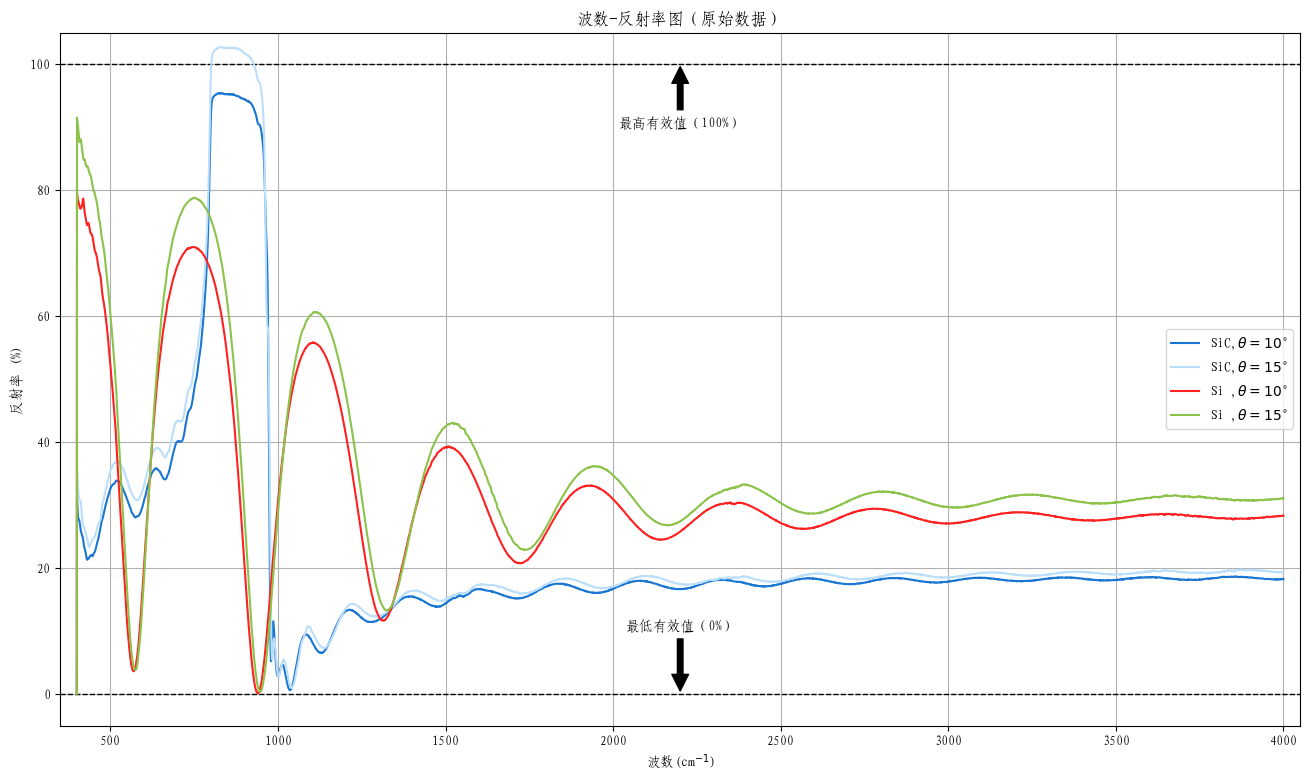

In [114]:
plt.figure(figsize=(16,9))
plt.plot([350,4050],[100,100],color="black",linestyle="--",linewidth=1)
plt.plot([350,4050],[0,0],color="black",linestyle="--",linewidth=1)
plt.plot(sic_10.loc[:,'波数 (cm-1)'],sic_10.loc[:,'反射率 (%)'],color=sic_10_color,label=r"SiC,$\theta=10^{\circ}$")
plt.plot(sic_15.loc[:,'波数 (cm-1)'],sic_15.loc[:,'反射率 (%)'],color=sic_15_color,label=r"SiC,$\theta=15^{\circ}$")
plt.plot(si_10.loc[:,'波数 (cm-1)'],si_10.loc[:,'反射率 (%)'],color=si_10_color,label=r"Si ,$\theta=10^{\circ}$")
plt.plot(si_15.loc[:,'波数 (cm-1)'],si_15.loc[:,'反射率 (%)'],color=si_15_color,label=r"Si ,$\theta=15^{\circ}$")
plt.xlabel("波数(cm$^{-1}$)")
plt.ylabel("反射率 (%)")
plt.annotate('最高有效值（100%）', xy=(2200, 100), xytext=(2200, 90),
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center')
plt.annotate('最低有效值（0%）', xy=(2200, 0), xytext=(2200, 10),
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center')
plt.xlim([350,4050])
plt.ylim([-5,105])
plt.legend()
plt.grid(True)
plt.title("波数-反射率图（原始数据）")
plt.savefig("../figure/波数-反射率图（原始数据）.png")

### 数据清洗

#### 缺失值处理

In [115]:
sic_10.dropna(inplace=True)
sic_15.dropna(inplace=True)
si_10.dropna(inplace=True)
si_15.dropna(inplace=True)

#### 异常值处理

In [116]:
sic_10 = sic_10[sic_10['反射率 (%)']>=0][sic_10['反射率 (%)']<100]
sic_15 = sic_15[sic_15['反射率 (%)']>=0][sic_15['反射率 (%)']<100]
si_10 = si_10[si_10['反射率 (%)']>=0][si_10['反射率 (%)']<100]
si_15 = si_15[si_15['反射率 (%)']>=0][si_15['反射率 (%)']<100]

#### 数据平滑

In [126]:
# """
# # 参数设置
# window_length = 51  # 奇数窗口长度
# polyorder = 3       # 多项式阶数

# # 对反射率列进行平滑
# df['smoothed_reflectance'] = savgol_filter(
#     df['reflectance'],
#     window_length=window_length,
#     polyorder=polyorder,
#     mode='mirror'  # 镜像边界处理
# )
# """

In [143]:
window_length = 51
polyorder = 3

sic_10['smooth_R'] = savgol_filter(
    sic_10['反射率 (%)'],
    window_length=window_length,
    polyorder=polyorder,
    mode="interp"
)
sic_15['smooth_R'] = savgol_filter(
    sic_15['反射率 (%)'],
    window_length=window_length,
    polyorder=polyorder,
    mode="mirror"
)
si_10['smooth_R'] = savgol_filter(
    si_10['反射率 (%)'],
    window_length=window_length,
    polyorder=polyorder,
    mode="mirror"
)
si_10['smooth_R'] = savgol_filter(
    si_10['反射率 (%)'],
    window_length=window_length,
    polyorder=polyorder,
    mode="mirror"
)

<Axes: xlabel='波数 (cm-1)'>

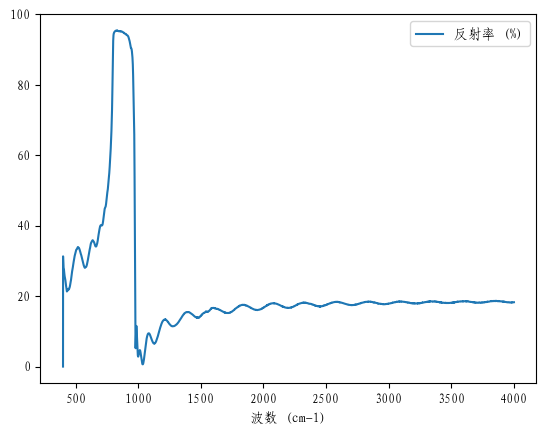

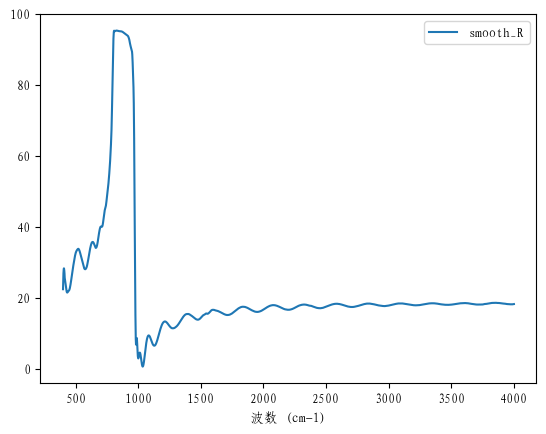

In [144]:
sic_10.plot(x="波数 (cm-1)",y="反射率 (%)")
sic_10.plot(x="波数 (cm-1)",y="smooth_R")

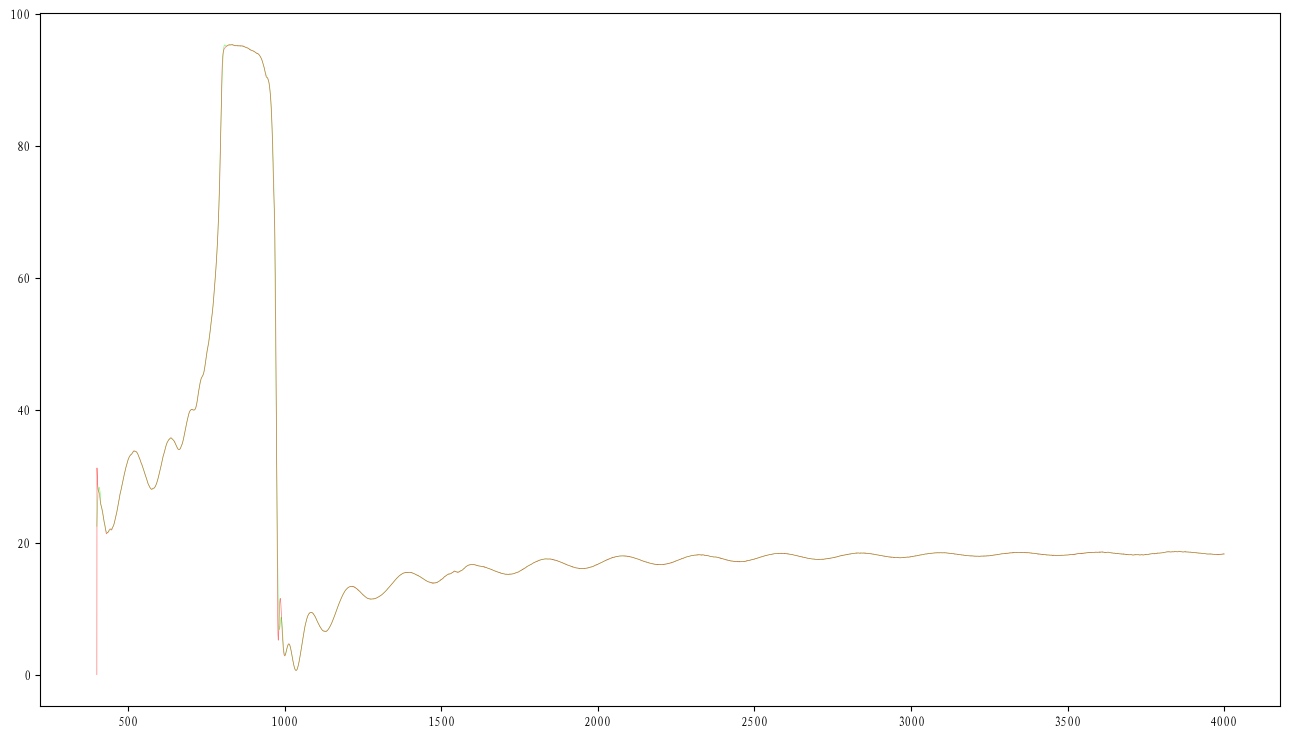

In [151]:
plt.figure(figsize=(16,9))
plt.plot(sic_10.loc[:,'波数 (cm-1)'],sic_10.loc[:,'smooth_R'],color="#00FF0088",linewidth=0.5)
plt.plot(sic_10.loc[:,'波数 (cm-1)'],sic_10.loc[:,'反射率 (%)'],color='#FF000088',linewidth=0.5)

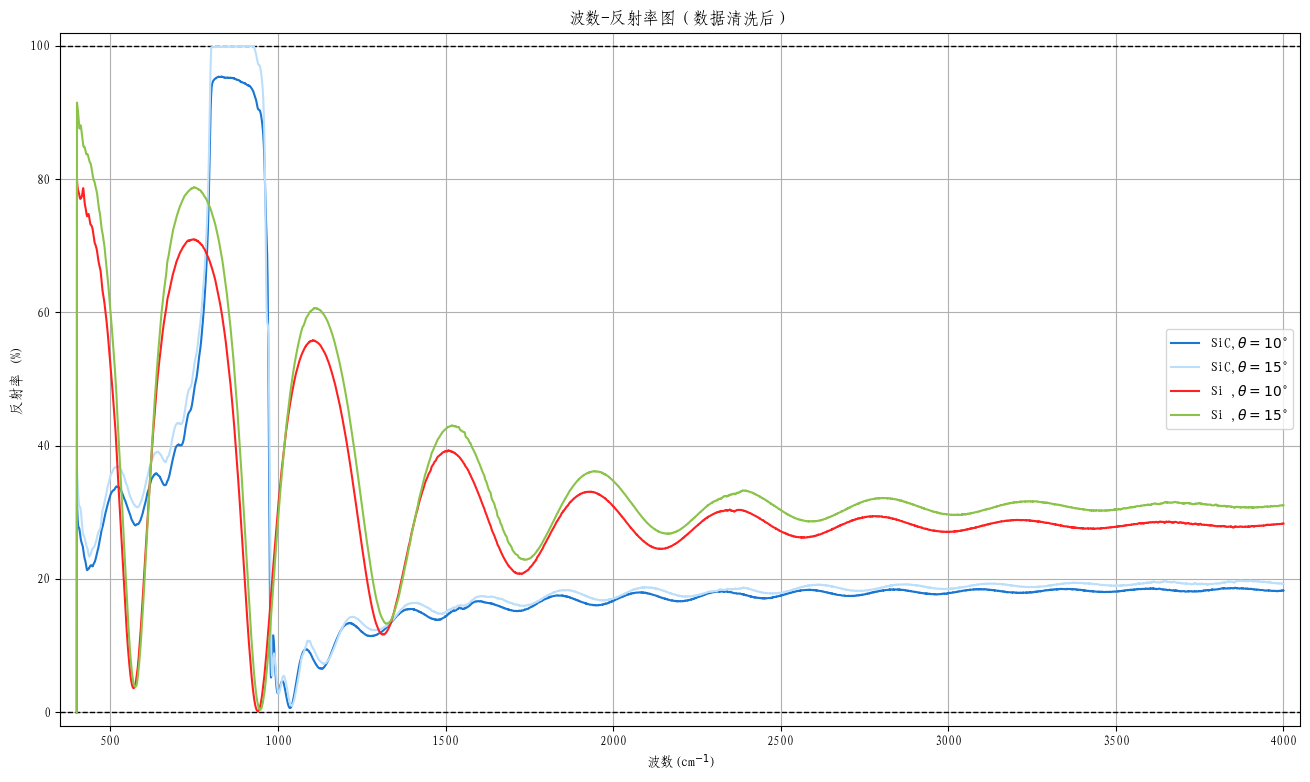

In [117]:
plt.figure(figsize=(16,9))
plt.plot([350,4050],[100,100],color="black",linestyle="--",linewidth=1)
plt.plot([350,4050],[0,0],color="black",linestyle="--",linewidth=1)
plt.plot(sic_10.loc[:,'波数 (cm-1)'],sic_10.loc[:,'反射率 (%)'],color=sic_10_color,label=r"SiC,$\theta=10^{\circ}$")
plt.plot(sic_15.loc[:,'波数 (cm-1)'],sic_15.loc[:,'反射率 (%)'],color=sic_15_color,label=r"SiC,$\theta=15^{\circ}$")
plt.plot(si_10.loc[:,'波数 (cm-1)'],si_10.loc[:,'反射率 (%)'],color=si_10_color,label=r"Si ,$\theta=10^{\circ}$")
plt.plot(si_15.loc[:,'波数 (cm-1)'],si_15.loc[:,'反射率 (%)'],color=si_15_color,label=r"Si ,$\theta=15^{\circ}$")
plt.xlabel("波数(cm$^{-1}$)")
plt.ylabel("反射率 (%)")
# plt.annotate('最高有效值（100%）', xy=(2200, 100), xytext=(2200, 90),
#              arrowprops=dict(facecolor='black', shrink=0.05),
#              horizontalalignment='center')
# plt.annotate('最低有效值（0%）', xy=(2200, 0), xytext=(2200, 10),
#              arrowprops=dict(facecolor='black', shrink=0.05),
#              horizontalalignment='center')
plt.xlim([350,4050])
plt.ylim([-2,102])
plt.legend()
plt.grid(True)
plt.title("波数-反射率图（数据清洗后）")
plt.savefig("../figure/波数-反射率图（数据清洗后）.png")

### 计算


折射定律：
$$
\frac{\sin{\theta_1}}{\sin{\theta_2}} = \frac{n_0}{n_1} \\
$$
$$
n_0\sin{\theta_1} = n_1\sin{\theta_2}
$$

波长-频率关系：
$$
\lambda = \frac{c}{\nu}
$$

推论1：
$$
\frac{\sin{\theta_1}}{\sin{\theta_2}} = \frac{n_0}{n_1} \to n_1 = n_0\frac{\sin{\theta_2}}{\sin{\theta_1}}
$$

### Test

In [118]:
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

In [119]:
# 示例数据生成（若已有数据可跳过此步）
x = np.linspace(400, 700, 301)  # 波数范围（示例）
y = np.random.normal(0.5, 0.1, 301)  # 模拟反射率（含噪声）
df = pd.DataFrame({'wave_number': x, 'reflectance': y})

<Axes: xlabel='wave_number'>

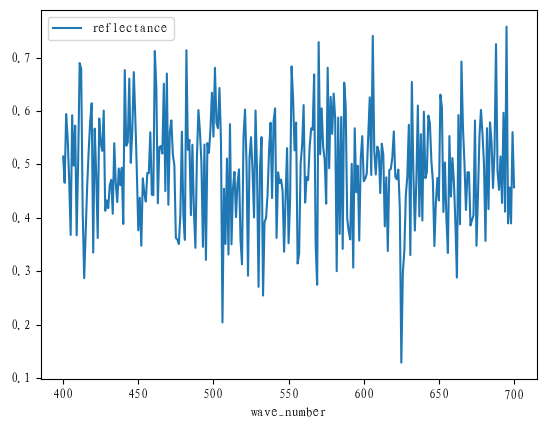

In [120]:
df.plot("wave_number")

In [121]:
# 参数设置
window_length = 51  # 奇数窗口长度
polyorder = 3       # 多项式阶数

# 对反射率列进行平滑
df['smoothed_reflectance'] = savgol_filter(
    df['reflectance'],
    window_length=window_length,
    polyorder=polyorder,
    mode='mirror'  # 镜像边界处理
)

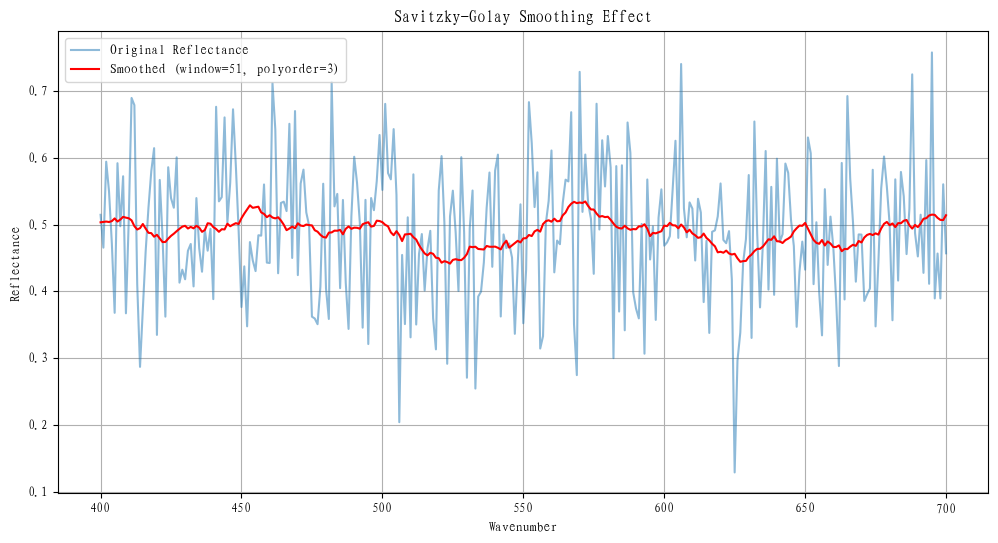

In [122]:
plt.figure(figsize=(12, 6))
plt.plot(df['wave_number'], df['reflectance'], 
         label='Original Reflectance', alpha=0.5)
plt.plot(df['wave_number'], df['smoothed_reflectance'], 
         label=f'Smoothed (window={window_length}, polyorder={polyorder})', color='red')
plt.xlabel('Wavenumber')
plt.ylabel('Reflectance')
plt.title('Savitzky-Golay Smoothing Effect')
plt.legend()
plt.grid(True)
plt.show()

使用 SciPy 找到 12 个显著波峰。
找到的波峰位于以下波数:
[ 517.7933  636.394   832.6155  985.4465 1012.445  1085.727  1216.38
 1401.513  1595.324  1836.865  2079.851  2322.356 ]


/home/u24/code/python/mathematical/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) FangSong_GB2312.
  fig.canvas.print_figure(bytes_io, **kw)
/home/u24/code/python/mathematical/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 185 (\N{SUPERSCRIPT ONE}) missing from font(s) FangSong_GB2312.
  fig.canvas.print_figure(bytes_io, **kw)


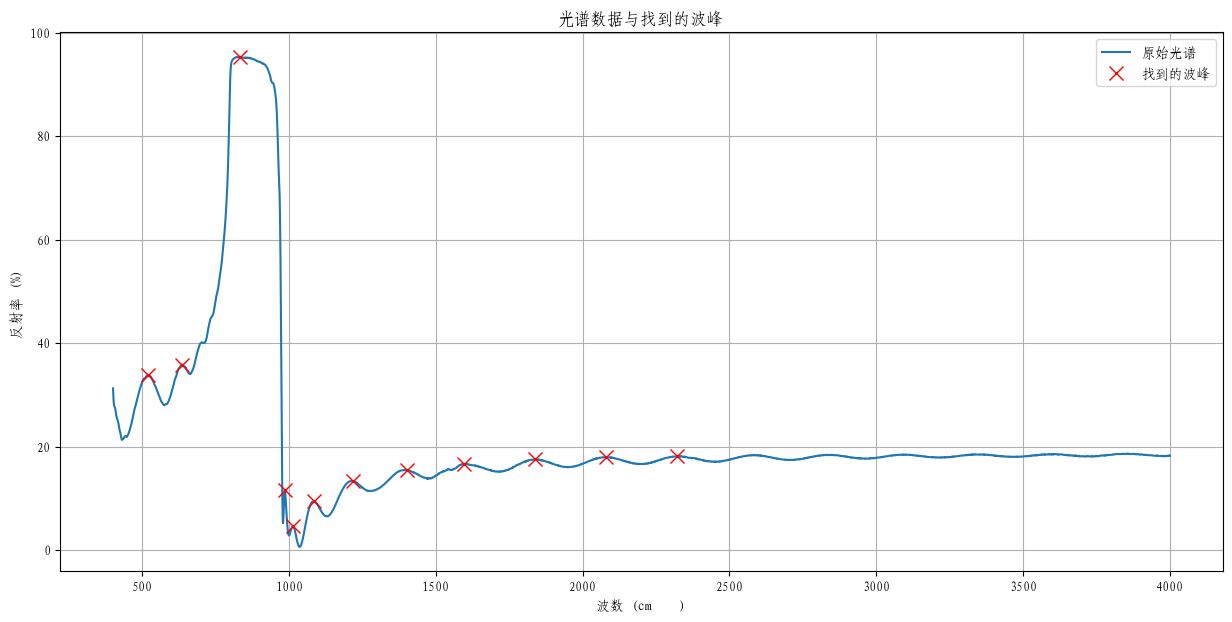

In [159]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

# 1. 加载数据
# 假设文件名为 '附件1.xlsx'，没有表头
# 第1列是波数(cm⁻¹)，第2列是反射率(%)
df = pd.read_excel('../data/附件/附件1.xlsx', header=1, names=['wavenumber', 'reflectance'])
wavenumbers = df['wavenumber'].values
reflectances = df['reflectance'].values

# 2. 使用 find_peaks 寻找波峰
# --- 调整这些参数是关键 ---
# height=20: 要求波峰的反射率至少要大于20%
# distance=50: 要求两个波峰之间至少相隔50个数据点
# prominence=5: 要求波峰至少要比周围突起5个反射率单位
# -----------------------------
peak_indices, properties = find_peaks(reflectances, 
                                      height=0, 
                                      distance=1, 
                                      prominence=1)

# 3. 提取找到的波峰信息
peak_wavenumbers = wavenumbers[peak_indices]
peak_reflectances = reflectances[peak_indices]

print(f"使用 SciPy 找到 {len(peak_indices)} 个显著波峰。")
print("找到的波峰位于以下波数:")
print(peak_wavenumbers)


# 4. 可视化结果进行验证 (非常重要的一步!)
plt.figure(figsize=(15, 7))
# 绘制原始光谱数据
plt.plot(wavenumbers, reflectances, label='原始光谱')
# 在找到的波峰位置绘制红色的'x'标记
plt.plot(peak_wavenumbers, peak_reflectances, "x", color='red', markersize=10, label='找到的波峰')

plt.title('光谱数据与找到的波峰')
plt.xlabel('波数 (cm⁻¹)')
plt.ylabel('反射率 (%)')
plt.legend()
plt.grid(True)
plt.show()

使用 SciPy 找到 11 个显著波峰。
找到的波峰位于以下波数:
[ 519.7218  639.7689  829.7228  988.3392 1016.784  1088.137  1221.684
 1416.459  1607.377  1866.756  2089.976 ]


/home/u24/code/python/mathematical/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) FangSong_GB2312.
  fig.canvas.print_figure(bytes_io, **kw)
/home/u24/code/python/mathematical/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 185 (\N{SUPERSCRIPT ONE}) missing from font(s) FangSong_GB2312.
  fig.canvas.print_figure(bytes_io, **kw)


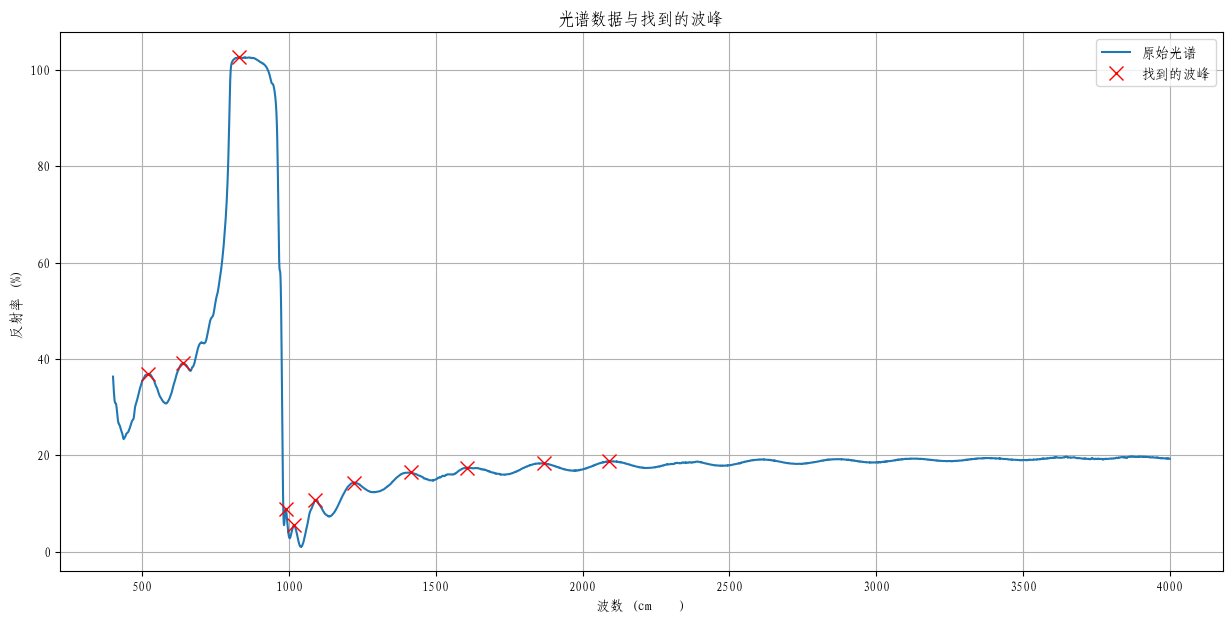

In [160]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

# 1. 加载数据
# 假设文件名为 '附件1.xlsx'，没有表头
# 第1列是波数(cm⁻¹)，第2列是反射率(%)
df = pd.read_excel('../data/附件/附件2.xlsx', header=1, names=['wavenumber', 'reflectance'])
wavenumbers = df['wavenumber'].values
reflectances = df['reflectance'].values

# 2. 使用 find_peaks 寻找波峰
# --- 调整这些参数是关键 ---
# height=20: 要求波峰的反射率至少要大于20%
# distance=50: 要求两个波峰之间至少相隔50个数据点
# prominence=5: 要求波峰至少要比周围突起5个反射率单位
# -----------------------------
peak_indices, properties = find_peaks(reflectances, 
                                      height=0, 
                                      distance=1, 
                                      prominence=1)

# 3. 提取找到的波峰信息
peak_wavenumbers = wavenumbers[peak_indices]
peak_reflectances = reflectances[peak_indices]

print(f"使用 SciPy 找到 {len(peak_indices)} 个显著波峰。")
print("找到的波峰位于以下波数:")
print(peak_wavenumbers)


# 4. 可视化结果进行验证 (非常重要的一步!)
plt.figure(figsize=(15, 7))
# 绘制原始光谱数据
plt.plot(wavenumbers, reflectances, label='原始光谱')
# 在找到的波峰位置绘制红色的'x'标记
plt.plot(peak_wavenumbers, peak_reflectances, "x", color='red', markersize=10, label='找到的波峰')

plt.title('光谱数据与找到的波峰')
plt.xlabel('波数 (cm⁻¹)')
plt.ylabel('反射率 (%)')
plt.legend()
plt.grid(True)
plt.show()